In [16]:
import pandas as pd
import numpy as np
from datascience import *
from datascience import Table
import matplotlib
from ipywidgets import interact, Dropdown


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Project 1: Covid-19 and Exponential Growth

## Table of Contents
<a href='#section 0'>Background Knowledge: Spread of Disease</a>

1.  <a href='#section 1'> The Data Science Life Cycle</a>

    a. <a href='#subsection 1a'>Formulating a question or problem</a> 

    b. <a href='#subsection 1b'>Acquiring and cleaning data</a>

    c. <a href='#subsection 1c'>Conducting exploratory data analysis</a>

    d. <a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

# The Data Science Life Cycle <a id='section 1'></a>

## Formulating a question or problem <a id='subsection 1a'></a>
It is important to ask questions that will be informative and that will avoid misleading results. There are many different questions we could ask about Covid-19, for example, many researchers use data to predict the outcomes based on intervention techniques such as social distancing.

<div class="alert alert-warning">
<b>Question:</b> Take some time to formulate questions you have about this pandemic and the data you would need to answer the questions. In addition, add the link of an article you found interesting with a description an why it interested you. 
   </div>
   
You can find [resources](https://docs.google.com/document/d/1yGSQkqlkroF6Efj3mHvP4sbQXyZM9ddO43YV1FQ75uQ/edit?usp=sharing) here to choose from.

Your questions: *here*


Data you would need: *here*


Article: *link*

## Acquiring and cleaning data <a id='subsection 1b'></a>

We'll be looking at the COVID-19 Data Repository from Johns Hopkins University. You can find the raw data [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). 

We've cleaned up the datasets a bit, but we will be investigating the number of cases, new cases, deaths, and new deaths for counties in states accross the US from March 2020 - May 2021.

The following table, `covid_statistics`, contains the several statistics collected at the start of each month for every county in the United States.

Columns dropped: `UID`, `iso2`, `iso3`, `code3`, `FIPS`, `Country_Region`, `Lat`, `Long_'`, `Combined_Key`

In [29]:
covid_statistics = Table().read_table("data/covid_timeseries.csv").drop(0, 1, 2, 3, 4, 7, 
                                                                        'Lat', 'Long_', 'Combined_Key')
covid_statistics

Admin2,Province_State,month,cases,cases_new,Population,deaths,deaths_new
Autauga,Alabama,3.31.20,8,8,55869,0,0
Baldwin,Alabama,3.31.20,23,23,223234,1,1
Barbour,Alabama,3.31.20,0,0,24686,0,0
Bibb,Alabama,3.31.20,3,3,22394,0,0
Blount,Alabama,3.31.20,7,7,57826,0,0
Bullock,Alabama,3.31.20,2,2,10101,0,0
Butler,Alabama,3.31.20,1,1,19448,0,0
Calhoun,Alabama,3.31.20,10,10,113605,0,0
Chambers,Alabama,3.31.20,40,40,33254,4,4
Cherokee,Alabama,3.31.20,1,1,26196,0,0


In [30]:
#Here, we are relabeling the columns to have more accurate names
covid_statistics = covid_statistics.relabel(make_array('Admin2', 'Province_State', 'month', 'cases', 
                                                      'cases_new', 'deaths', 'deaths_new'),
                                            make_array('County', 'State', 'Date', 'Cases', 
                                                      'New Cases', 'Deaths', 'New Deaths'))
covid_statistics

County,State,Date,Cases,New Cases,Population,Deaths,New Deaths
Autauga,Alabama,3.31.20,8,8,55869,0,0
Baldwin,Alabama,3.31.20,23,23,223234,1,1
Barbour,Alabama,3.31.20,0,0,24686,0,0
Bibb,Alabama,3.31.20,3,3,22394,0,0
Blount,Alabama,3.31.20,7,7,57826,0,0
Bullock,Alabama,3.31.20,2,2,10101,0,0
Butler,Alabama,3.31.20,1,1,19448,0,0
Calhoun,Alabama,3.31.20,10,10,113605,0,0
Chambers,Alabama,3.31.20,40,40,33254,4,4
Cherokee,Alabama,3.31.20,1,1,26196,0,0


<div class="alert alert-warning">
<b>Question:</b> It's important to evalute our data source. What do you know about Johns Hopkins University? What motivations do they have for collecting this data? What data is missing?
   </div>

*Insert answer*

<div class="alert alert-warning">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? 
    
   </div>

In [43]:
total_rows = ...

*Insert answer here*

<div class="alert alert-warning">
<b>Question:</b> What does each row represent?
   </div>    

*Insert answer here*

## Conducting exploratory data analysis <a id='subsection 1c'></a>

Visualizations help us to understand what the dataset is telling us. Compare the county with the most confirmed cases on April 1st with the next 9 most confirmed cases in a bar chart. 

### Part 1

<div class="alert alert-warning">
<b>Question:</b> First, sort the dataset to show the counties with the highest number of new cases for a given month.   
    
   </div>

In [ ]:
new_cases_sorted = covid_statistics.sort('...', descending=...)
new_cases_sorted

In [32]:
#KEY
new_cases_sorted = covid_statistics.sort('New Cases', descending=True)
new_cases_sorted

County,State,Date,Cases,New Cases,Population,Deaths,New Deaths
Los Angeles,California,12.31.20,771519,370071,10039107,10359,2703
Los Angeles,California,1.31.21,1116948,345429,10039107,16770,6411
Maricopa,Arizona,1.31.21,472760,153933,4485414,7462,2352
Cook,Illinois,11.30.20,306369,116709,5150233,6436,951
Maricopa,Arizona,12.31.20,318827,113169,4485414,5110,1128
San Bernardino,California,12.31.20,194377,100706,2180085,1591,368
Orange,California,12.31.20,182684,94732,3175692,1875,298
Los Angeles,California,11.30.20,401448,93830,10039107,7656,585
Riverside,California,12.31.20,180553,93170,2470546,1985,543
Riverside,California,1.31.21,271910,91357,2470546,3091,1106


<div class="alert alert-warning">
<b>Question:</b> Now, cut down the table to only have the top twenty from sorted_cases above.
   </div>

In [6]:
top_twenty = new_cases_sorted...(np.arange(20))
top_twenty

In [33]:
#KEY
top_twenty = new_cases_sorted.take(np.arange(20))
top_twenty

County,State,Date,Cases,New Cases,Population,Deaths,New Deaths
Los Angeles,California,12.31.20,771519,370071,10039107,10359,2703
Los Angeles,California,1.31.21,1116948,345429,10039107,16770,6411
Maricopa,Arizona,1.31.21,472760,153933,4485414,7462,2352
Cook,Illinois,11.30.20,306369,116709,5150233,6436,951
Maricopa,Arizona,12.31.20,318827,113169,4485414,5110,1128
San Bernardino,California,12.31.20,194377,100706,2180085,1591,368
Orange,California,12.31.20,182684,94732,3175692,1875,298
Los Angeles,California,11.30.20,401448,93830,10039107,7656,585
Riverside,California,12.31.20,180553,93170,2470546,1985,543
Riverside,California,1.31.21,271910,91357,2470546,3091,1106


<div class="alert alert-warning">
<b>Question:</b> Next, create a bar chart to visualize the comparison between the top_ten counties for the number of cases on April 1st.
   </div>

In [ ]:
top_twenty...("...", "...")

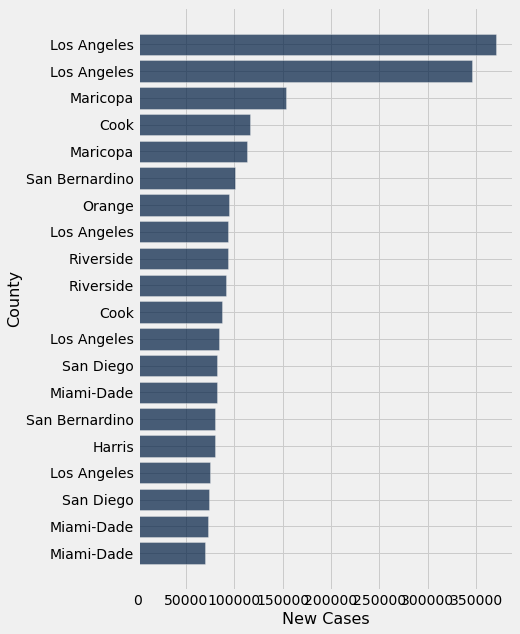

In [34]:
top_twenty.barh("County", "New Cases")

<div class="alert alert-warning">
<b>Question:</b> Let's look at the counties in California. First, return a table that only has the California counties. Then, select the counties from the table you want to compare to each other. 
   </div>

In [11]:
ca_cases = covid_statistics.where("...", are.equal_to("..."))
ca_cases

In [35]:
#KEY
ca_cases = covid_statistics.where("State", are.equal_to("California"))
ca_cases

County,State,Date,Cases,New Cases,Population,Deaths,New Deaths
Alameda,California,3.31.20,313,313,1671329,7,7
Alpine,California,3.31.20,0,0,1129,0,0
Amador,California,3.31.20,2,2,39752,0,0
Butte,California,3.31.20,8,8,219186,0,0
Calaveras,California,3.31.20,3,3,45905,0,0
Colusa,California,3.31.20,1,1,21547,0,0
Contra Costa,California,3.31.20,212,212,1153526,3,3
Del Norte,California,3.31.20,0,0,27812,0,0
El Dorado,California,3.31.20,15,15,192843,0,0
Fresno,California,3.31.20,53,53,999101,0,0


In [36]:
select_counties = ["Los Angeles", "Alameda", "...", "...", "..."]

#This will take the counties you choose for the comparison.
my_counties = ca_cases.where("County", are.contained_in(select_counties))
my_counties

County,State,Date,Cases,New Cases,Population,Deaths,New Deaths
Alameda,California,3.31.20,313,313,1671329,7,7
Los Angeles,California,3.31.20,3019,3018,10039107,54,54
Alameda,California,4.30.20,1603,1290,1671329,60,53
Los Angeles,California,4.30.20,23220,20201,10039107,1111,1057
Alameda,California,5.31.20,3390,1787,1671329,98,38
Los Angeles,California,5.31.20,55001,31781,10039107,2362,1251
Alameda,California,6.30.20,5964,2574,1671329,137,39
Los Angeles,California,6.30.20,103850,48849,10039107,3371,1009
Alameda,California,7.31.20,11139,5175,1671329,187,50
Los Angeles,California,7.31.20,188541,84691,10039107,4624,1253


<div class="alert alert-warning">
<b>Question:</b> Now make another bar chart using your selected counties and the number of cases on May 1st.
   </div>

In [24]:
...

Ellipsis

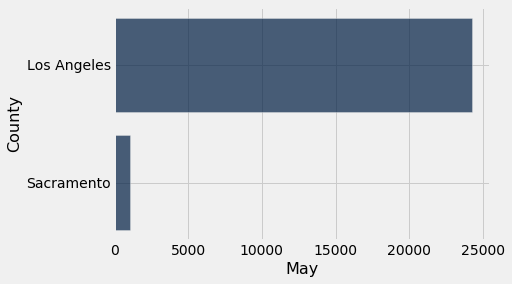

In [51]:
#KEY
my_counties.barh("County", "May")

<div class="alert alert-warning">
<b>Question:</b> What are some possible reasons for the disparities in certain counties? Hint: Think about the size of the counties.
   </div>

*Insert answer here.*

### Part 2

A disease will spread more when there are more people in a population to spread to. Let's look at the population of the states to compare the percentages based on the number of people. Here is a table with the states and their populations. 

In [54]:
pop_by_state = Table().read_table("data/pop_by_state.csv")
pop_by_state

State,Population
Alabama,4903185
Alaska,731545
American Samoa,55641
Arizona,7278717
Arkansas,3017804
California,39512223
Colorado,5758736
Connecticut,3565287
Delaware,973764
Diamond Princess,0


<div class="alert alert-warning">
<b>Question:</b> First, group the confirmed cases to show the number of cases for each state and the sum of the cases.
   </div>

In [55]:
#We are grouping all the counties into their states and taking the sum of the cases using this code.
grouped_by_state = confirmed_cases.group("State", sum)
grouped_by_state

State,County sum,Combined_Key sum,April sum,May sum,June sum
Alabama,,,1060,7294,18630
Alaska,,,132,364,466
American Samoa,,,0,0,0
Arizona,,,1413,7969,20129
Arkansas,,,584,3337,7443
California,,,9399,52026,114733
Colorado,,,3342,15793,26563
Connecticut,,,3557,28764,42740
Delaware,,,368,4918,9605
District of Columbia,,,586,4658,8857


In [56]:
#Now we will drop the County sum and Combined_Key sum because they 
#do not have numbers to add and we do not need the columns anymore.
grouped_by_state = grouped_by_state.drop(1, 2)
grouped_by_state

State,April sum,May sum,June sum
Alabama,1060,7294,18630
Alaska,132,364,466
American Samoa,0,0,0
Arizona,1413,7969,20129
Arkansas,584,3337,7443
California,9399,52026,114733
Colorado,3342,15793,26563
Connecticut,3557,28764,42740
Delaware,368,4918,9605
District of Columbia,586,4658,8857


<div class="alert alert-warning">
<b>Question:</b> Now that we have it grouped by state, let's first look at the number of cases in June so we can compare it to the percentages we will look at later.
   </div>

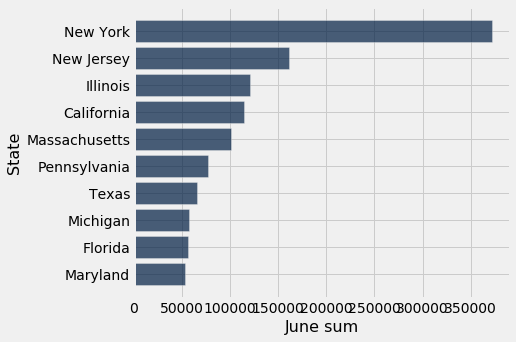

In [82]:
#Run this cell to see the number of
grouped_by_state.sort("June sum", descending = True).take(np.arange(10)).barh("State", "June sum")

<div class="alert alert-warning">
<b>Question:</b> Now join this table with the pop_by_state table. 
   </div>

In [15]:
#We are going to join the two tables by providing the column they share which is "State".
with_pop = grouped_by_state.join("State", pop_by_state)
with_pop

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum,Population
Alabama,0,1060,7294,18630,4903185
Alaska,0,132,364,466,731545
American Samoa,0,0,0,0,55641
Arizona,1,1413,7969,20129,7278717
Arkansas,0,584,3337,7443,3017804
California,12,9399,52026,114733,39512223
Colorado,0,3342,15793,26563,5758736
Connecticut,0,3557,28764,42740,3565287
Delaware,0,368,4918,9605,973764
District of Columbia,0,586,4658,8857,705749


<div class="alert alert-warning">
<b>Question:</b> Add a column called "Percentage" that has the number of cases collected in June divided by the population.
   </div>

In [34]:
#First, we want to find the columns that would make up an array of the percentages.
june_cases = with_pop.column("6/1/2020 sum")
population = ...
percentage = (.../...)*100
percentage

In [16]:
#KEY
june_cases = with_pop.column("6/1/2020 sum")
population = with_pop.column("Population")
percentage = (june_cases/population)*100
percentage

array([0.37995711, 0.0637008 , 0.        , 0.27654599, 0.2466363 ,
       0.29037344, 0.46126442, 1.19878147, 0.98637863, 1.25497875,
       0.26459957, 0.45116409, 0.10655852, 0.04604936, 0.15886384,
       0.95672122, 0.51736285, 0.62436016, 0.34050569, 0.22485979,
       0.86777345, 0.17474922, 0.88206786, 1.4625311 , 0.57607714,
       0.44697952, 0.52927458, 0.20711186, 0.04856013, 0.74157055,
       0.28251816, 0.34455851, 1.81169284, 0.37199028, 1.4208228 ,
       0.28214877, 0.34446016, 0.03989555, 0.30784235, 0.16611191,
       0.10199782, 0.59870384, 0.13203073, 1.41509835, 0.23594241,
       0.56903281, 0.33043528, 0.22621489, 0.31188805, 0.15753483,
       0.06525711, 0.53187158, 0.2886055 , 0.11316036, 0.31847506,
       0.15723298])

In [21]:
with_pct = with_pop.with_column("...", ...)
with_pct

In [17]:
#KEY
with_pct = with_pop.with_column("Percentage", percentage)
with_pct

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum,Population,Percentage
Alabama,0,1060,7294,18630,4903185,0.379957
Alaska,0,132,364,466,731545,0.0637008
American Samoa,0,0,0,0,55641,0
Arizona,1,1413,7969,20129,7278717,0.276546
Arkansas,0,584,3337,7443,3017804,0.246636
California,12,9399,52026,114733,39512223,0.290373
Colorado,0,3342,15793,26563,5758736,0.461264
Connecticut,0,3557,28764,42740,3565287,1.19878
Delaware,0,368,4918,9605,973764,0.986379
District of Columbia,0,586,4658,8857,705749,1.25498


<div class="alert alert-warning">
<b>Question:</b> Like we did in the previous section, sort with_pct and include the top ten states with the most cases on June 1st. Then, create a bar chart to compare the states with the highest percentages of cases.
   </div>

In [38]:
top_ten_pct = ...

In [18]:
#KEY
top_ten_pct = with_pct.sort("Percentage", descending = True).take(np.arange(10))
top_ten_pct

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum,Population,Percentage
New Jersey,0,22255,121190,160918,8882190,1.81169
Massachusetts,1,7738,64311,100805,6892503,1.46253
New York,0,83948,308314,371711,26161672,1.42082
Rhode Island,1,566,8962,14991,1059361,1.4151
District of Columbia,0,586,4658,8857,705749,1.25498
Connecticut,0,3557,28764,42740,3565287,1.19878
Delaware,0,368,4918,9605,973764,0.986379
Illinois,3,6980,56055,121234,12671821,0.956721
Maryland,0,1986,23472,53327,6045680,0.882068
Louisiana,0,6424,28711,40341,4648794,0.867773


In [40]:
#fill in the code to make the bar chart looking at the States and their Percentages.
...

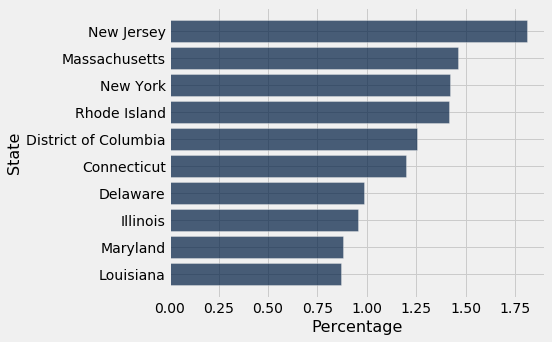

In [19]:
#KEY
top_ten_pct.barh("State", "Percentage")

<div class="alert alert-warning">
<b>Question:</b> What differences do you see from the bar chart of the states when we just saw the number of cases? Give some possible reasons for the differences.
   </div>

*Insert answer here.*

## Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Now that we have some experience making these visualizations, let's go back to exponential growth. We know that, without intervention, a disease can behave like a rumor and spread at an alarming rate. From the previous section, we also know that we need to take into account the population of the region when looking at the number of cases.

Now we will read in two tables: Covid by State and Population by state in order to look at the percentage of the cases. And the growth of the 

In [60]:
covid_by_state = Table().read_table("data/covid_by_state.csv")
covid_by_state.show(5)

Days since 3/1/20,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,1,0,12,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,11,0,0,0
1,0,0,0,1,0,21,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,18,0,0,0
2,0,0,0,1,0,25,0,0,0,0,2,2,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,27,0,0,0
3,0,0,0,1,0,35,0,0,0,0,2,2,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,11,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,39,0,0,0
4,0,0,0,1,0,51,2,0,0,0,3,2,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,2,2,0,23,1,0,0,0,0,3,0,0,2,0,0,1,3,0,0,0,0,70,0,0,0


In [71]:
#run this cell to get a line plot!
def plot_states(state_1, state_2):
    covid_by_state.select(0, state_1, state_2).plot(0)
interact(plot_states, 
         state_1=Dropdown(options=covid_by_state.labels[1:]), 
         state_2=Dropdown(options=covid_by_state.labels[1:]));

interactive(children=(Dropdown(description='state_1', options=('Alabama', 'Alaska', 'American Samoa', 'Arizona…

Possible widget. Look at the growth of the cases and try to explain using your knowledge and other sources. Tell a story. (Presentation)

Tell us what you learned about the two states you chose.

Tell us something interesting about this data

Source: How Math (and Vaccines) Keep You Safe From the Flu by Patrick Honner (Quanta Magazine)
Notebook Authors: Alleanna Clark, Ashley Quiterio, Karla Palos Castellanos